In [2]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
imagePath = "D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Tonle Sap Lake/2015/R10m/"

band2_path = imagePath + 'L2A_T48PUV_20151231T033142_B02_10m.jp2'
band3_path = imagePath + 'L2A_T48PUV_20151231T033142_B03_10m.jp2'
band4_path = imagePath + 'L2A_T48PUV_20151231T033142_B04_10m.jp2'
band8_path = imagePath + 'L2A_T48PUV_20151231T033142_B08_10m.jp2'

band2 = rasterio.open(band2_path, driver='JP2OpenJPEG') #blue
band3 = rasterio.open(band3_path, driver='JP2OpenJPEG') #green
band4 = rasterio.open(band4_path, driver='JP2OpenJPEG') #red
band8 = rasterio.open(band8_path, driver='JP2OpenJPEG') #nir

In [6]:
#number of raster bands
band4.count

1

In [8]:
#number of raster columns
band4.width

10980

In [10]:
#number of raster rows
band4.height

10980

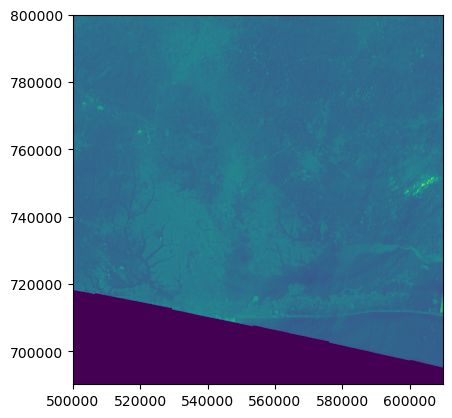

<Axes: >

In [12]:
#plot band 
plot.show(band4)

In [14]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [16]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32631)

In [18]:
#raster transform parameters
band4.transform

Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 800040.0)

In [20]:
#raster values as matrix array
band4.read(1)

array([[2558, 2570, 2496, ..., 2360, 2330, 2246],
       [2490, 2504, 2476, ..., 2322, 2282, 2242],
       [2538, 2516, 2472, ..., 2324, 2282, 2252],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

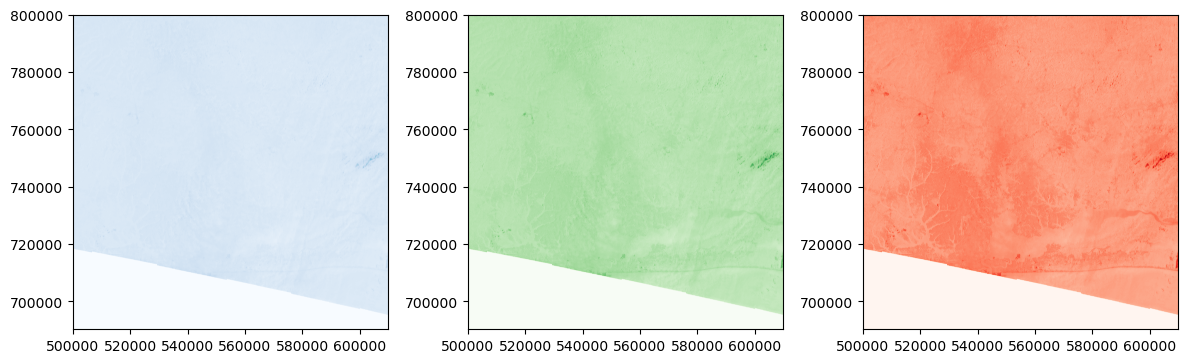

In [22]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [126]:
#export true color image
trueColor = rasterio.open('D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Tonle Sap Lake/2015/SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

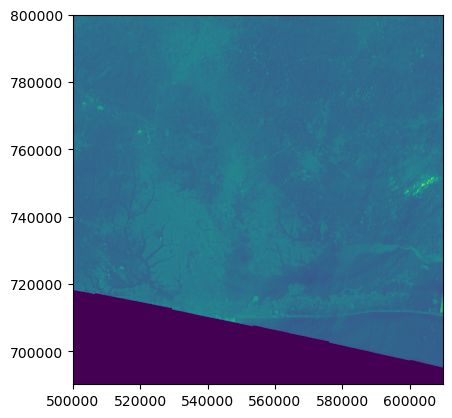

<Axes: >

In [26]:
src = rasterio.open(r"D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Makoko slum/2019/SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [128]:
#export false color image
falseColor = rasterio.open('D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Tonle Sap Lake/2015/SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()

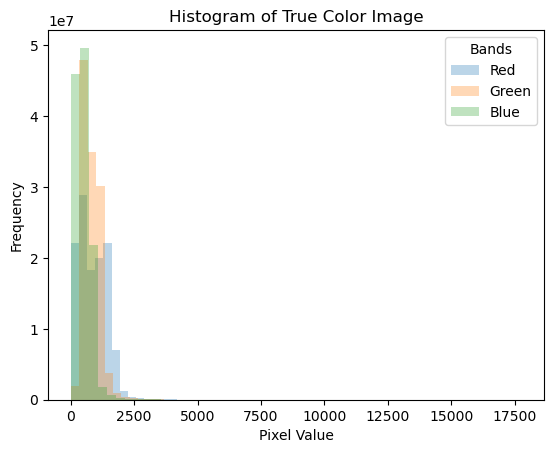

In [130]:
#generate histogram
# Open the true color image
trueColor = rasterio.open('D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Tonle Sap Lake/2015/SentinelTrueColor2.tiff')

# Extract the band data
band1 = trueColor.read(1)
band2 = trueColor.read(2)
band3 = trueColor.read(3)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the histogram for each band
ax.hist(band1.flatten(), bins=50, alpha=0.3, label='Red', histtype='stepfilled')
ax.hist(band2.flatten(), bins=50, alpha=0.3, label='Green', histtype='stepfilled')
ax.hist(band3.flatten(), bins=50, alpha=0.3, label='Blue', histtype='stepfilled')

# Set the title and labels
ax.set_title("Histogram of True Color Image")
ax.set_xlabel("Pixel Value")
ax.set_ylabel("Frequency")

# Add a legend
ax.legend(loc='upper right', title="Bands")

# Show the plot
plt.show()